# Visualizing linear relationships

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
sns.set(color_codes=True)

untuk mengimpor dataset Seaborn mempunyai beberapa dataset bawaan yang telah diinstal secara otomatis

In [5]:
#Untuk melihat berbagai dataset bawaan yang terdapat dalam seaborn
print(sns.get_dataset_names())

C:\Users\ASUS\Anaconda3\lib\site-packages\seaborn\utils.py:376: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 376 of the file C:\Users\ASUS\Anaconda3\lib\site-packages\seaborn\utils.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  gh_list = BeautifulSoup(http)


['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'tips', 'titanic']


In [6]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# Functions to draw linear regression models

Dua fungsi utama dalam seaborn digunakan untuk memvisualisasikan hubungan linear sebagaimana ditentukan melalui regresi. Fungsi-fungsi ini, regplot () dan lmplot () terkait erat, dan berbagi banyak fungsi inti mereka. Namun, penting untuk memahami perbedaannya, sehingga Anda dapat dengan cepat memilih alat yang tepat untuk pekerjaan tertentu.

Dalam doa paling sederhana, kedua fungsi menggambar sebaris dua variabel, x dan y, dan kemudian cocok dengan model regresi y ~ x dan plot garis regresi yang dihasilkan dan interval kepercayaan 95% untuk regresi itu:

Fungsi regplot() dan lmplot() menggunakan kedua fungsi tersebut UNTUK menampilkan grafik regresi linear, dari grafik yg 
menggunakan regplot() dan lmplot() yang tampak identik hanya saja tedapat perbedaan dari segi ukuran saja

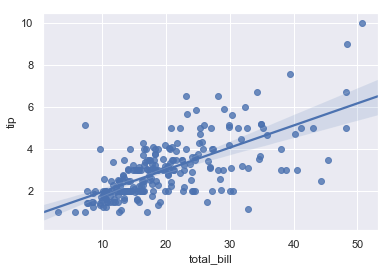

In [7]:
sns.regplot(x="total_bill", y="tip", data=tips);

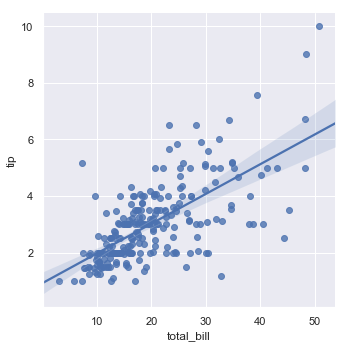

In [8]:
sns.lmplot(x="total_bill", y="tip", data=tips);

Anda harus mencatat bahwa plot yang dihasilkan identik, kecuali bahwa bentuk gambarnya berbeda. Kami akan menjelaskan mengapa ini tidak lama. Untuk saat ini, perbedaan utama lainnya yang perlu diketahui adalah regplot () menerima variabel x dan y dalam berbagai format termasuk array numpy sederhana, objek Seri panda, atau sebagai referensi ke variabel dalam objek DataFrame panda yang diteruskan ke data. Sebaliknya, lmplot () memiliki data sebagai parameter yang diperlukan dan variabel x dan y harus ditentukan sebagai string. Format data ini disebut data "bentuk panjang" atau "rapi". Selain fleksibilitas input ini, regplot () memiliki subset fitur lmplot (), jadi kami akan mendemonstrasikannya menggunakan yang terakhir.

Dimungkinkan untuk menyesuaikan dengan regresi linier ketika salah satu variabel mengambil nilai diskrit, namun, sebar sederhana yang dihasilkan oleh jenis dataset ini sering tidak optimal:

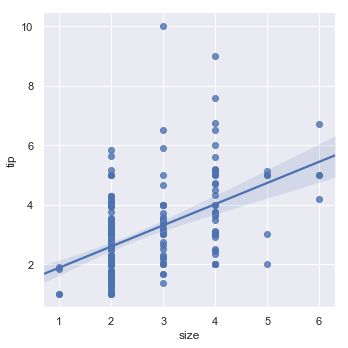

In [9]:
# melakukan pemodelan regresi linear pada dua variabel dimana salah satunya peubahnya besifat diskrit
sns.lmplot(x="size", y="tip", data=tips);


Salah satu opsi adalah menambahkan beberapa noise acak ("jitter") ke nilai diskrit untuk membuat distribusi nilai-nilai itu lebih jelas. Perhatikan bahwa jitter hanya diterapkan pada data sebar dan tidak memengaruhi garis regresi sesuai dengan sendirinya:

Salah satu opsi adalah menambahkan beberapa noise acak ("jitter") ke nilai diskrit untuk membuat distribusi nilai-nilai itu lebih jelas.

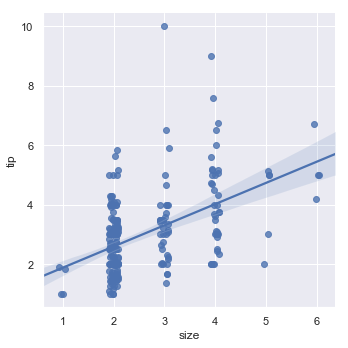

In [10]:
sns.lmplot(x="size", y="tip", data=tips, x_jitter=.09);


Pilihan kedua adalah merobohkan pengamatan di masing-masing tempat terpisah untuk memplot estimasi kecenderungan sentral bersama dengan interval kepercayaan:

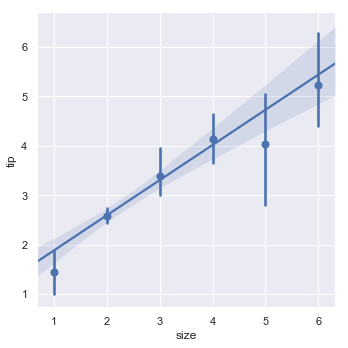

In [11]:
# x_estimator=np.mean= Mmenghitung nilai rata-rata dari estimasi x

sns.lmplot(x="size", y="tip", data=tips, x_estimator=np.mean);

# Fitting different kinds of models


Model regresi linier sederhana yang digunakan di atas sangat sederhana untuk dicocokkan, namun, itu tidak sesuai untuk beberapa jenis dataset. Dataset kuartet Anscombe menunjukkan beberapa contoh di mana regresi linier sederhana memberikan perkiraan hubungan yang identik di mana inspeksi visual sederhana jelas menunjukkan perbedaan. Misalnya, dalam kasus pertama, regresi linier adalah model yang baik:

In [ ]:
# menampilkan data anscombe, data ini bersifat non linear
anscombe = sns.load_dataset("anscombe")
anscombe.tail()

In [ ]:
#Menampilkan dataset 1 pada data anscombe
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
           ci=None, scatter_kws={"s": 50});
# 80 merupakan ukuran sebaran pada scaterplot 
# Query adalah semacam kemampuan untuk menampilkan suatu data dari database dimana 
# mengambil dari table-tabel yang ada di database, namun tabel tersebut tidak semua ditampilkan sesuai dengan yang kita inginkan.

Hubungan linear dalam dataset kedua adalah sama, tetapi plot dengan jelas menunjukkan bahwa ini bukan model yang baik:

In [ ]:
#Menampilkan dataset 2 pada data anscombe
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           ci=None, scatter_kws={"s": 80});

Di hadapan jenis hubungan tingkat tinggi ini, lmplot () dan regplot () dapat cocok dengan model regresi polinomial untuk mengeksplorasi jenis tren nonlinier sederhana dalam dataset:

In [ ]:
# REGRESI POLINOMIAL ORDE 2
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           order=2, ci=None, scatter_kws={"s": 80});

Masalah yang berbeda diajukan oleh pengamatan "outlier" yang menyimpang karena beberapa alasan selain hubungan utama yang diteliti:

In [ ]:
#Menampilkan dataset 3 pada data anscombe

sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           ci=None, scatter_kws={"s": 100});

Di hadapan pencilan, dapat berguna untuk menyesuaikan regresi yang kuat, yang menggunakan fungsi kerugian yang berbeda untuk menurunkan residu yang relatif besar:

In [ ]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           robust=True, ci=None, scatter_kws={"s": 80});


Ketika variabel y adalah biner, regresi linier sederhana juga "berfungsi" tetapi memberikan prediksi yang tidak masuk akal:

In [ ]:
tips["big_tip"] = (tips.tip / tips.total_bill) > .15
sns.lmplot(x="total_bill", y="big_tip", data=tips,
           y_jitter=.03); #semakin besar nilai "jitter" semakin banyak/jelas tumpukan titik2 pada grafik

Solusi dalam kasus ini adalah mencocokkan regresi logistik, sehingga garis regresi menunjukkan perkiraan probabilitas y = 1 untuk nilai x yang diberikan:

In [ ]:
sns.lmplot(x="total_bill", y="big_tip", data=tips,
           logistic=True, y_jitter=.03);

Perhatikan bahwa perkiraan regresi logistik jauh lebih intensif secara komputasi (ini juga berlaku untuk regresi yang kuat) daripada regresi sederhana, dan karena interval kepercayaan di sekitar garis regresi dihitung menggunakan prosedur bootstrap, Anda mungkin ingin mematikannya lebih cepat iterasi (menggunakan ci = Tidak Ada).

Pendekatan yang sama sekali berbeda adalah agar sesuai dengan regresi nonparametrik menggunakan lowess lebih halus. Pendekatan ini memiliki asumsi paling sedikit, meskipun intensif secara komputasi dan saat ini interval kepercayaan tidak dihitung sama sekali:

In [ ]:
sns.lmplot(x="total_bill", y="tip", data=tips,
           lowess=True);

Fungsi residplot () dapat menjadi alat yang berguna untuk memeriksa apakah model regresi sederhana sesuai untuk suatu dataset. Ini cocok dan menghilangkan regresi linier sederhana dan kemudian memplot nilai residual untuk setiap pengamatan. Idealnya, nilai-nilai ini harus tersebar secara acak di sekitar y = 0:

In [ ]:
#Fungsi residplot () dapat menjadi alat yang berguna untuk memeriksa apakah model regresi sederhana sesuai untuk suatu dataset. Ini cocok dan menghilangkan regresi linier sederhana dan kemudian memplot nilai residual untuk setiap pengamatan.
#Fungsi residplot () dapat menjadi alat yang berguna untuk memeriksa apakah model regresi sederhana sesuai untuk suatu dataset. Ini cocok dan menghilangkan regresi linier sederhana dan kemudian memplot nilai residual untuk setiap pengamatan. Idealnya, nilai-nilai ini harus tersebar secara acak di sekitar y = 0:
sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
              scatter_kws={"s": 80});


Jika ada struktur dalam residu, itu menunjukkan bahwa regresi linier sederhana tidak sesuai:

In [ ]:
sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
              scatter_kws={"s": 80});

# Conditioning on other variables

Plot di atas menunjukkan banyak cara untuk mengeksplorasi hubungan antara sepasang variabel. Namun, sering kali, pertanyaan yang lebih menarik adalah "bagaimana hubungan antara dua variabel ini berubah sebagai fungsi dari variabel ketiga?" Di sinilah perbedaan antara regplot () dan lmplot () muncul. Meskipun regplot () selalu menunjukkan hubungan tunggal, lmplot () menggabungkan regplot () dengan FacetGrid untuk menyediakan antarmuka yang mudah untuk menunjukkan regresi linier pada plot “faceted” yang memungkinkan Anda menjelajahi interaksi dengan hingga tiga variabel kategori tambahan.

Cara terbaik untuk memisahkan suatu hubungan adalah dengan memplot kedua level pada sumbu yang sama dan menggunakan warna untuk membedakannya:

In [ ]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips);
# fungsi "hue" untuk memasukan variabel smoker dalam grafik

Selain warna, dimungkinkan untuk menggunakan marker sebar yang berbeda untuk membuat plot reproduksi menjadi hitam putih lebih baik. Anda juga memiliki kontrol penuh atas warna yang digunakan:

In [ ]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips,
           markers=["o", "x"], palette="Set1");
# fungsi "makers" untuk mengatur bentuk sebaran yang berbeda
# fungsi "palatte" untuk mengontrol warna yang di gunakan

Untuk menambahkan variabel lain, Anda bisa menggambar beberapa "segi" yang setiap tingkat variabel muncul di baris atau kolom kisi:

In [ ]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", col="time", data=tips,palette="Set1");

In [ ]:
sns.lmplot(x="total_bill", y="tip", hue="smoker",
           col="time", row="sex", data=tips);

# Mengontrol ukuran dan bentuk plot
Sebelumnya kami mencatat bahwa plot default yang dibuat oleh regplot () dan lmplot () terlihat sama tetapi pada sumbu yang memiliki ukuran dan bentuk yang berbeda. Ini karena regplot () adalah fungsi “level-sumbu” yang menarik ke sumbu tertentu. Ini berarti Anda dapat membuat angka multi-panel sendiri dan mengontrol dengan tepat kemana plot regresi berjalan. Jika tidak ada objek sumbu disediakan secara eksplisit, itu hanya menggunakan sumbu "saat ini aktif", itulah sebabnya plot default memiliki ukuran dan bentuk yang sama seperti kebanyakan fungsi matplotlib lainnya. Untuk mengontrol ukuran, Anda perlu membuat objek gambar sendiri.

In [ ]:
f, ax = plt.subplots(figsize=(5, 6))
sns.regplot(x="total_bill", y="tip", data=tips, ax=ax);

Sebaliknya, ukuran dan bentuk gambar lmplot () dikontrol melalui antarmuka FacetGrid menggunakan parameter ukuran dan aspek, yang berlaku untuk setiap aspek dalam plot, bukan pada keseluruhan gambar itu sendiri:

In [ ]:
sns.lmplot(x="total_bill", y="tip", col="day", data=tips);

In [ ]:
sns.lmplot(x="total_bill", y="tip", col="day", data=tips,
           aspect=.5);
# fungsi "aspect" mengatur ukuran plot

# Merencanakan regresi dalam konteks lain
Beberapa fungsi dasar laut lainnya menggunakan regplot () dalam konteks plot yang lebih besar dan lebih kompleks. Yang pertama adalah fungsi jointplot () yang kami perkenalkan dalam tutorial distribusi. Selain gaya plot yang telah dibahas sebelumnya, jointplot () dapat menggunakan regplot () untuk menunjukkan kecocokan regresi linier pada sumbu bersama dengan mengirimkan kind = "reg":

In [ ]:
sns.jointplot(x="total_bill", y="tip", data=tips, kind="reg");
#jointplot () dapat menggunakan regplot () untuk menunjukkan kecocokan regresi linier pada sumbu bersama dengan mengirimkan kind = "reg":

Menggunakan fungsi pairplot () dengan kind = "reg" menggabungkan regplot () dan PairGrid untuk menunjukkan hubungan linier antara variabel dalam dataset. Perhatikan bagaimana ini berbeda dari lmplot (). Pada gambar di bawah ini, kedua sumbu tidak menunjukkan hubungan yang sama dikondisikan pada dua tingkat variabel ketiga; alih-alih, PairGrid () digunakan untuk menunjukkan banyak hubungan antara pasangan variabel yang berbeda dalam suatu dataset:

In [ ]:
sns.pairplot(tips, x_vars=["total_bill", "size"], y_vars=["tip"],
            kind="reg");

Like lmplot(), but unlike jointplot(), conditioning on an additional categorical variable is built into pairplot() using the hue parameter:

In [ ]:
sns.pairplot(tips, x_vars=["total_bill", "size"], y_vars=["tip"],
             hue="smoker", kind="reg");